In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#to take care of floating point numbers during division
from __future__ import division

In [4]:
#to grab data from the web
import requests

from StringIO import StringIO

In [5]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [6]:
source = requests.get(url).text

In [7]:
poll_data = StringIO(source)

In [8]:
poll_df = pd.read_csv(poll_data)

In [9]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


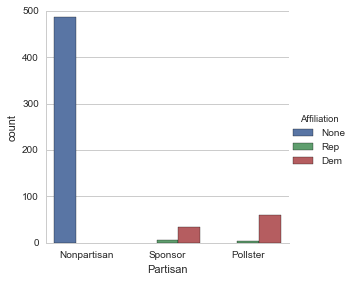

In [11]:
sns.factorplot('Partisan',data = poll_df, kind='count',hue='Affiliation')

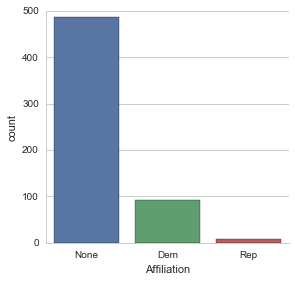

In [12]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count',order=['None','Dem','Rep'])

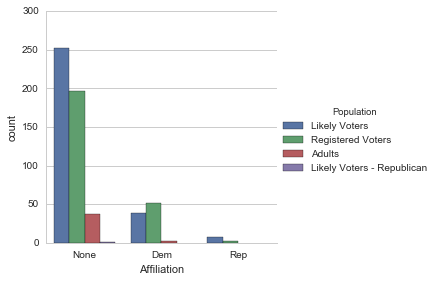

In [13]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count', hue = 'Population',order=['None','Dem','Rep'])

In [14]:
avg = pd.DataFrame(poll_df.mean())
avg

,0
Number of Observations,1296.197531
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [15]:
avg.drop('Number of Observations',inplace=True)

In [16]:
avg.head()

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [17]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',inplace=True)

In [18]:
std

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


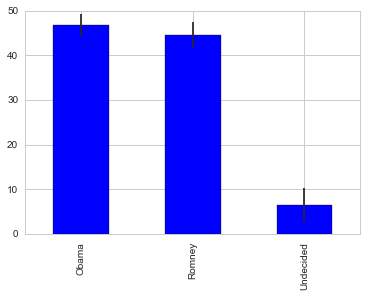

In [19]:
avg.plot(yerr=std,kind='bar',legend=False)

In [20]:
poll_avg = pd.concat([avg,std],axis=1)

In [21]:
poll_avg.columns=['avg','std']

In [22]:
poll_avg

,avg,std
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


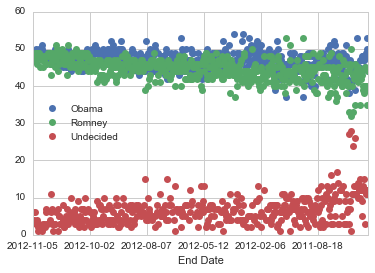

In [23]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [24]:
from datetime import datetime

In [25]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [26]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

In [27]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


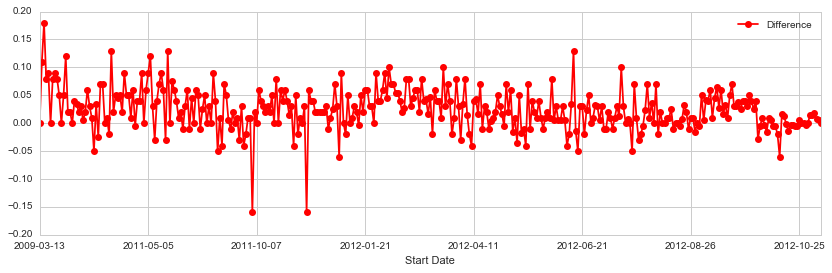

In [32]:
poll_df.plot('Start Date','Difference',figsize=(14,4),linestyle='-',marker='o',color='r')

In [34]:
row_in = 0
xlimit=[]

for date in poll_df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in +=1
        
print min(xlimit)
print max(xlimit)

329
356


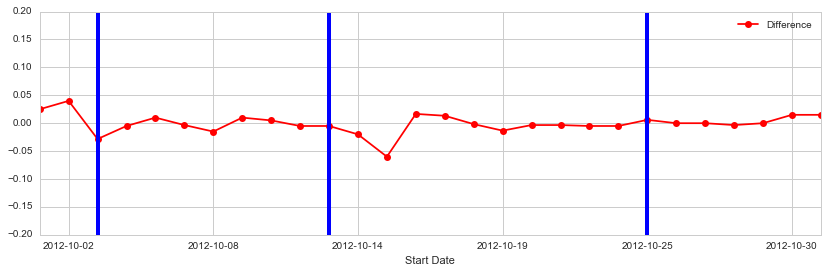

In [38]:
poll_df.plot('Start Date','Difference',figsize=(14,4),linestyle='-',marker='o',color='r',xlim=(329,356))

#oct 3rd
plt.axvline(x=329+2,linewidth=4,color='blue')
#oct 11th
plt.axvline(x=329+10,linewidth=4,color='blue')
#oct 22nd
plt.axvline(x=329+21,linewidth=4,color='blue')

In [39]:
pwd

u'/Users/Anirudh/ipython'

In [40]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 129.9+ MB


In [42]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [43]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [45]:
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print "The average donation was %.2f with std of %.2f" %(don_mean, don_std)

The average donation was 298.24 with std of 3749.67


In [46]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [47]:
top_donor.sort()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if __name__ == '__main__':


In [55]:
top_donor = top_donor[top_donor>0]
top_donor.sort()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


In [58]:
top_donor.value_counts().head(10)

100     178188
50      137584
25      110345
250      91182
500      57984
2500     49005
35       37237
1000     36494
10       33986
200      27813
Name: contb_receipt_amt, dtype: int64

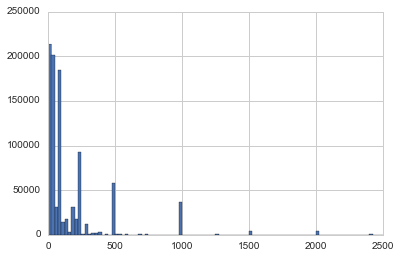

In [62]:
com_don = top_donor[top_donor<2500]

com_don.hist(bins=100)

In [63]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [64]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [65]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [66]:
# Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

# Preview DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [69]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [70]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [92]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i=0

for don in cand_amount:
    print 'The candidate %s raised $ %.0f' %(cand_amount.index[i],don)
    print '\n'
    i += 1
    

The candidate Bachmann, Michelle raised $ 2711439


The candidate Cain, Herman raised $ 7101082


The candidate Gingrich, Newt raised $ 12832770


The candidate Huntsman, Jon raised $ 3330373


The candidate Johnson, Gary Earl raised $ 566962


The candidate McCotter, Thaddeus G raised $ 39030


The candidate Obama, Barack raised $ 135877427


The candidate Paul, Ron raised $ 21009620


The candidate Pawlenty, Timothy raised $ 6004819


The candidate Perry, Rick raised $ 20305754


The candidate Roemer, Charles E. 'Buddy' III raised $ 373010


The candidate Romney, Mitt raised $ 88335908


The candidate Santorum, Rick raised $ 11043159




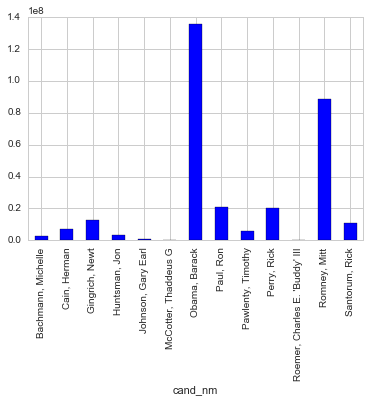

In [93]:
cand_amount.plot(kind='bar')

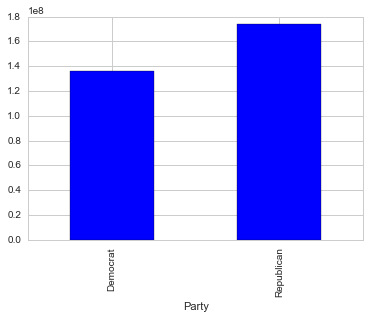

In [94]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [97]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', index ='contbr_occupation', columns='Party',aggfunc='sum')

In [107]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45067 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
Democrat      29166 non-null float64
Republican    21081 non-null float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [108]:
occupation_df1 = occupation_df[occupation_df.sum(1) > 1000000]

In [109]:
occupation_df1

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.430000
BANKER,224084.40,1259468.730000
BUSINESS OWNER,449979.30,1323342.430000
C.E.O.,1690.00,2592983.110000
CEO,2073284.79,1618057.410000
CHAIRMAN,496547.00,1296092.750000
CONSULTANT,2459912.71,2544725.450000
ENGINEER,951525.55,1818373.700000
EXECUTIVE,1355161.05,4138850.090000


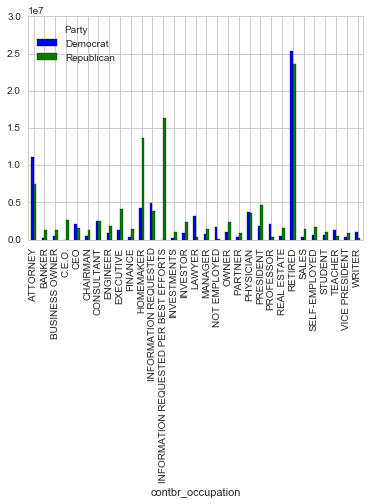

In [110]:
occupation_df1.plot(kind='bar')

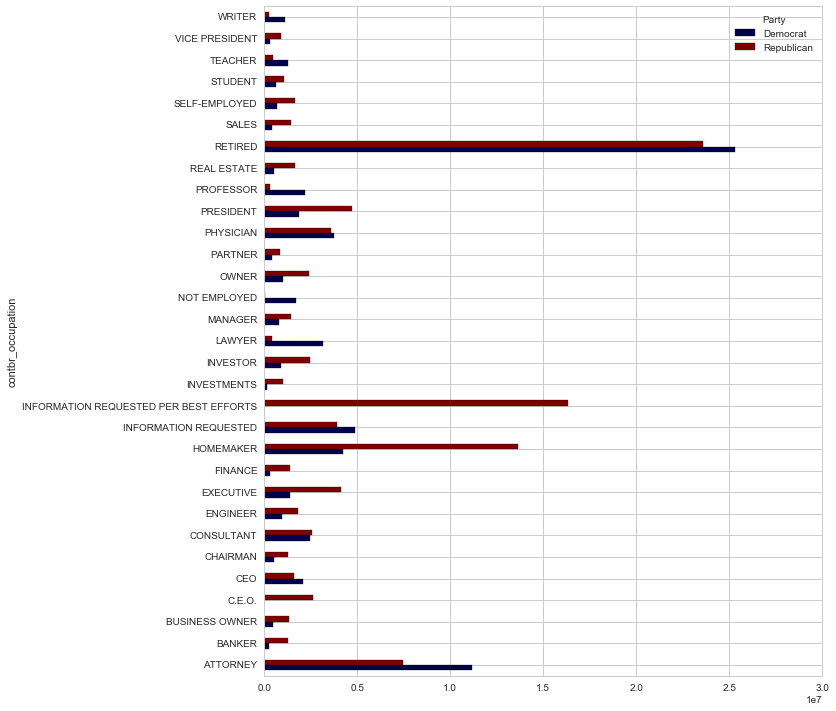

In [112]:
occupation_df1.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [113]:
occupation_df1.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
occupation_df1.loc['CEO'] = occupation_df1.loc['CEO'] + occupation_df1.loc['C.E.O.']

occupation_df1.drop('C.E.O.',inplace=True)


//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


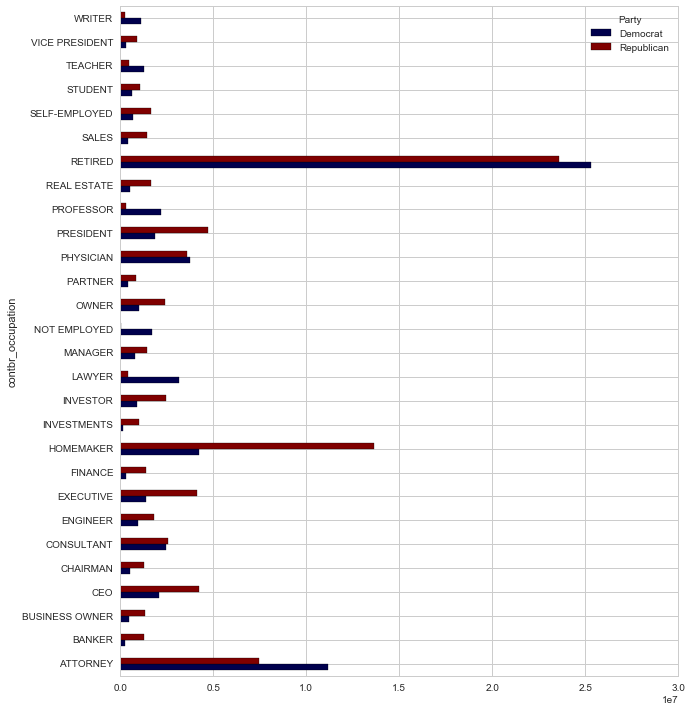

In [122]:
occupation_df1.plot(kind='barh',figsize=(10,12),cmap='seismic')